In [1]:
import torch
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
image_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_maps.npy"
label_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_shortest_paths.npy"
matrix_path = "/workspaces/masters_project/data/warcraft_shortest_path_oneskin/12x12/train_vertex_weights.npy"

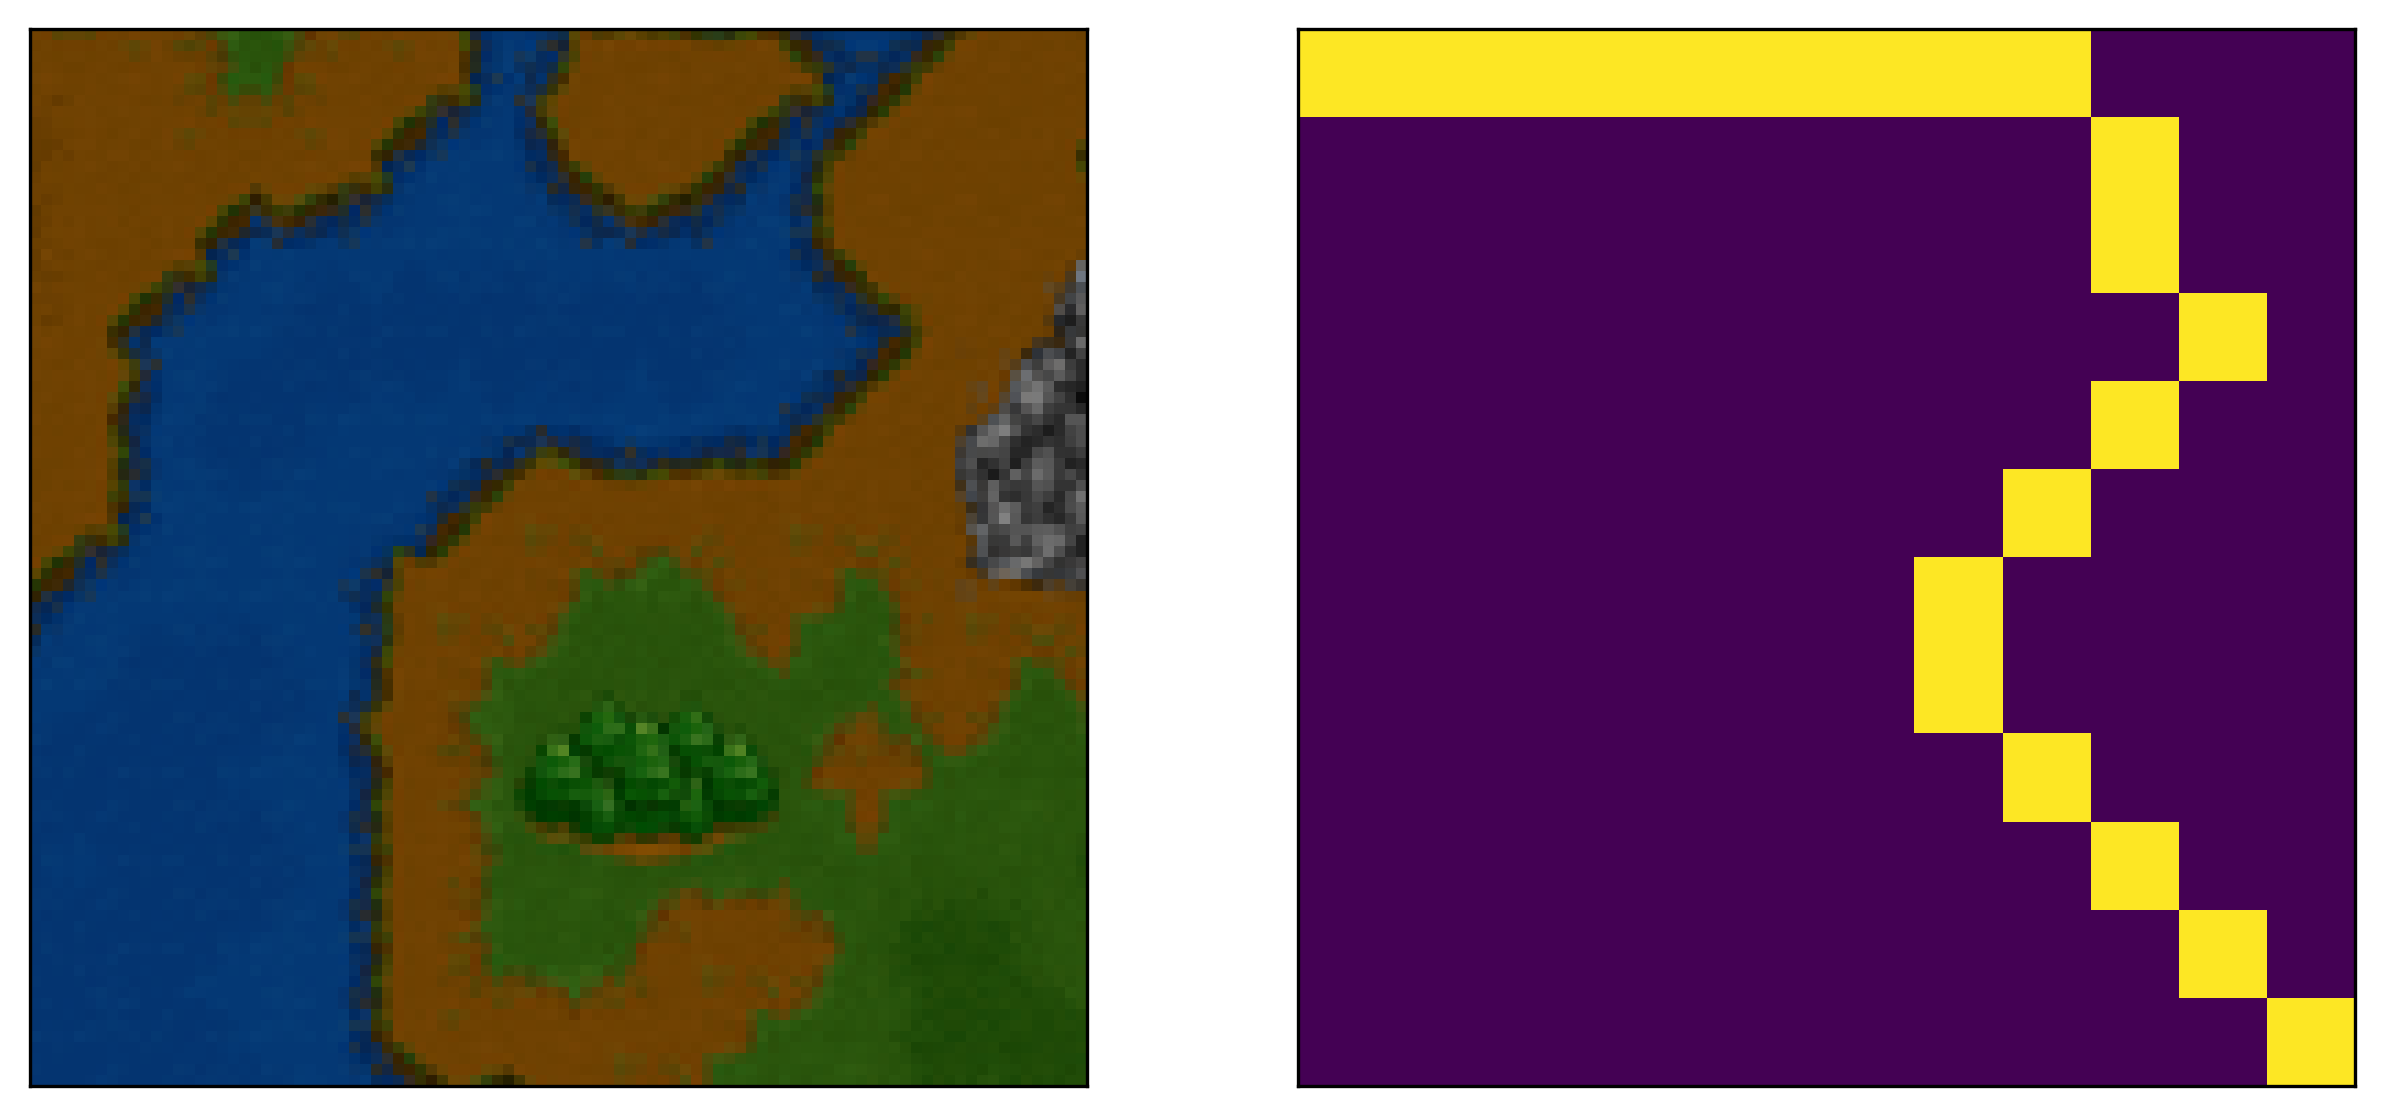

In [2]:
trial_index = 44
image = np.load(image_path)[trial_index]
label = np.load(label_path)[trial_index]
#plot the image and label side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), dpi=300)

ax1.imshow(image)
ax2.imshow(label)
#remove the x, y labels
ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])
plt.savefig("test.png")
plt.savefig("original_data.pdf")


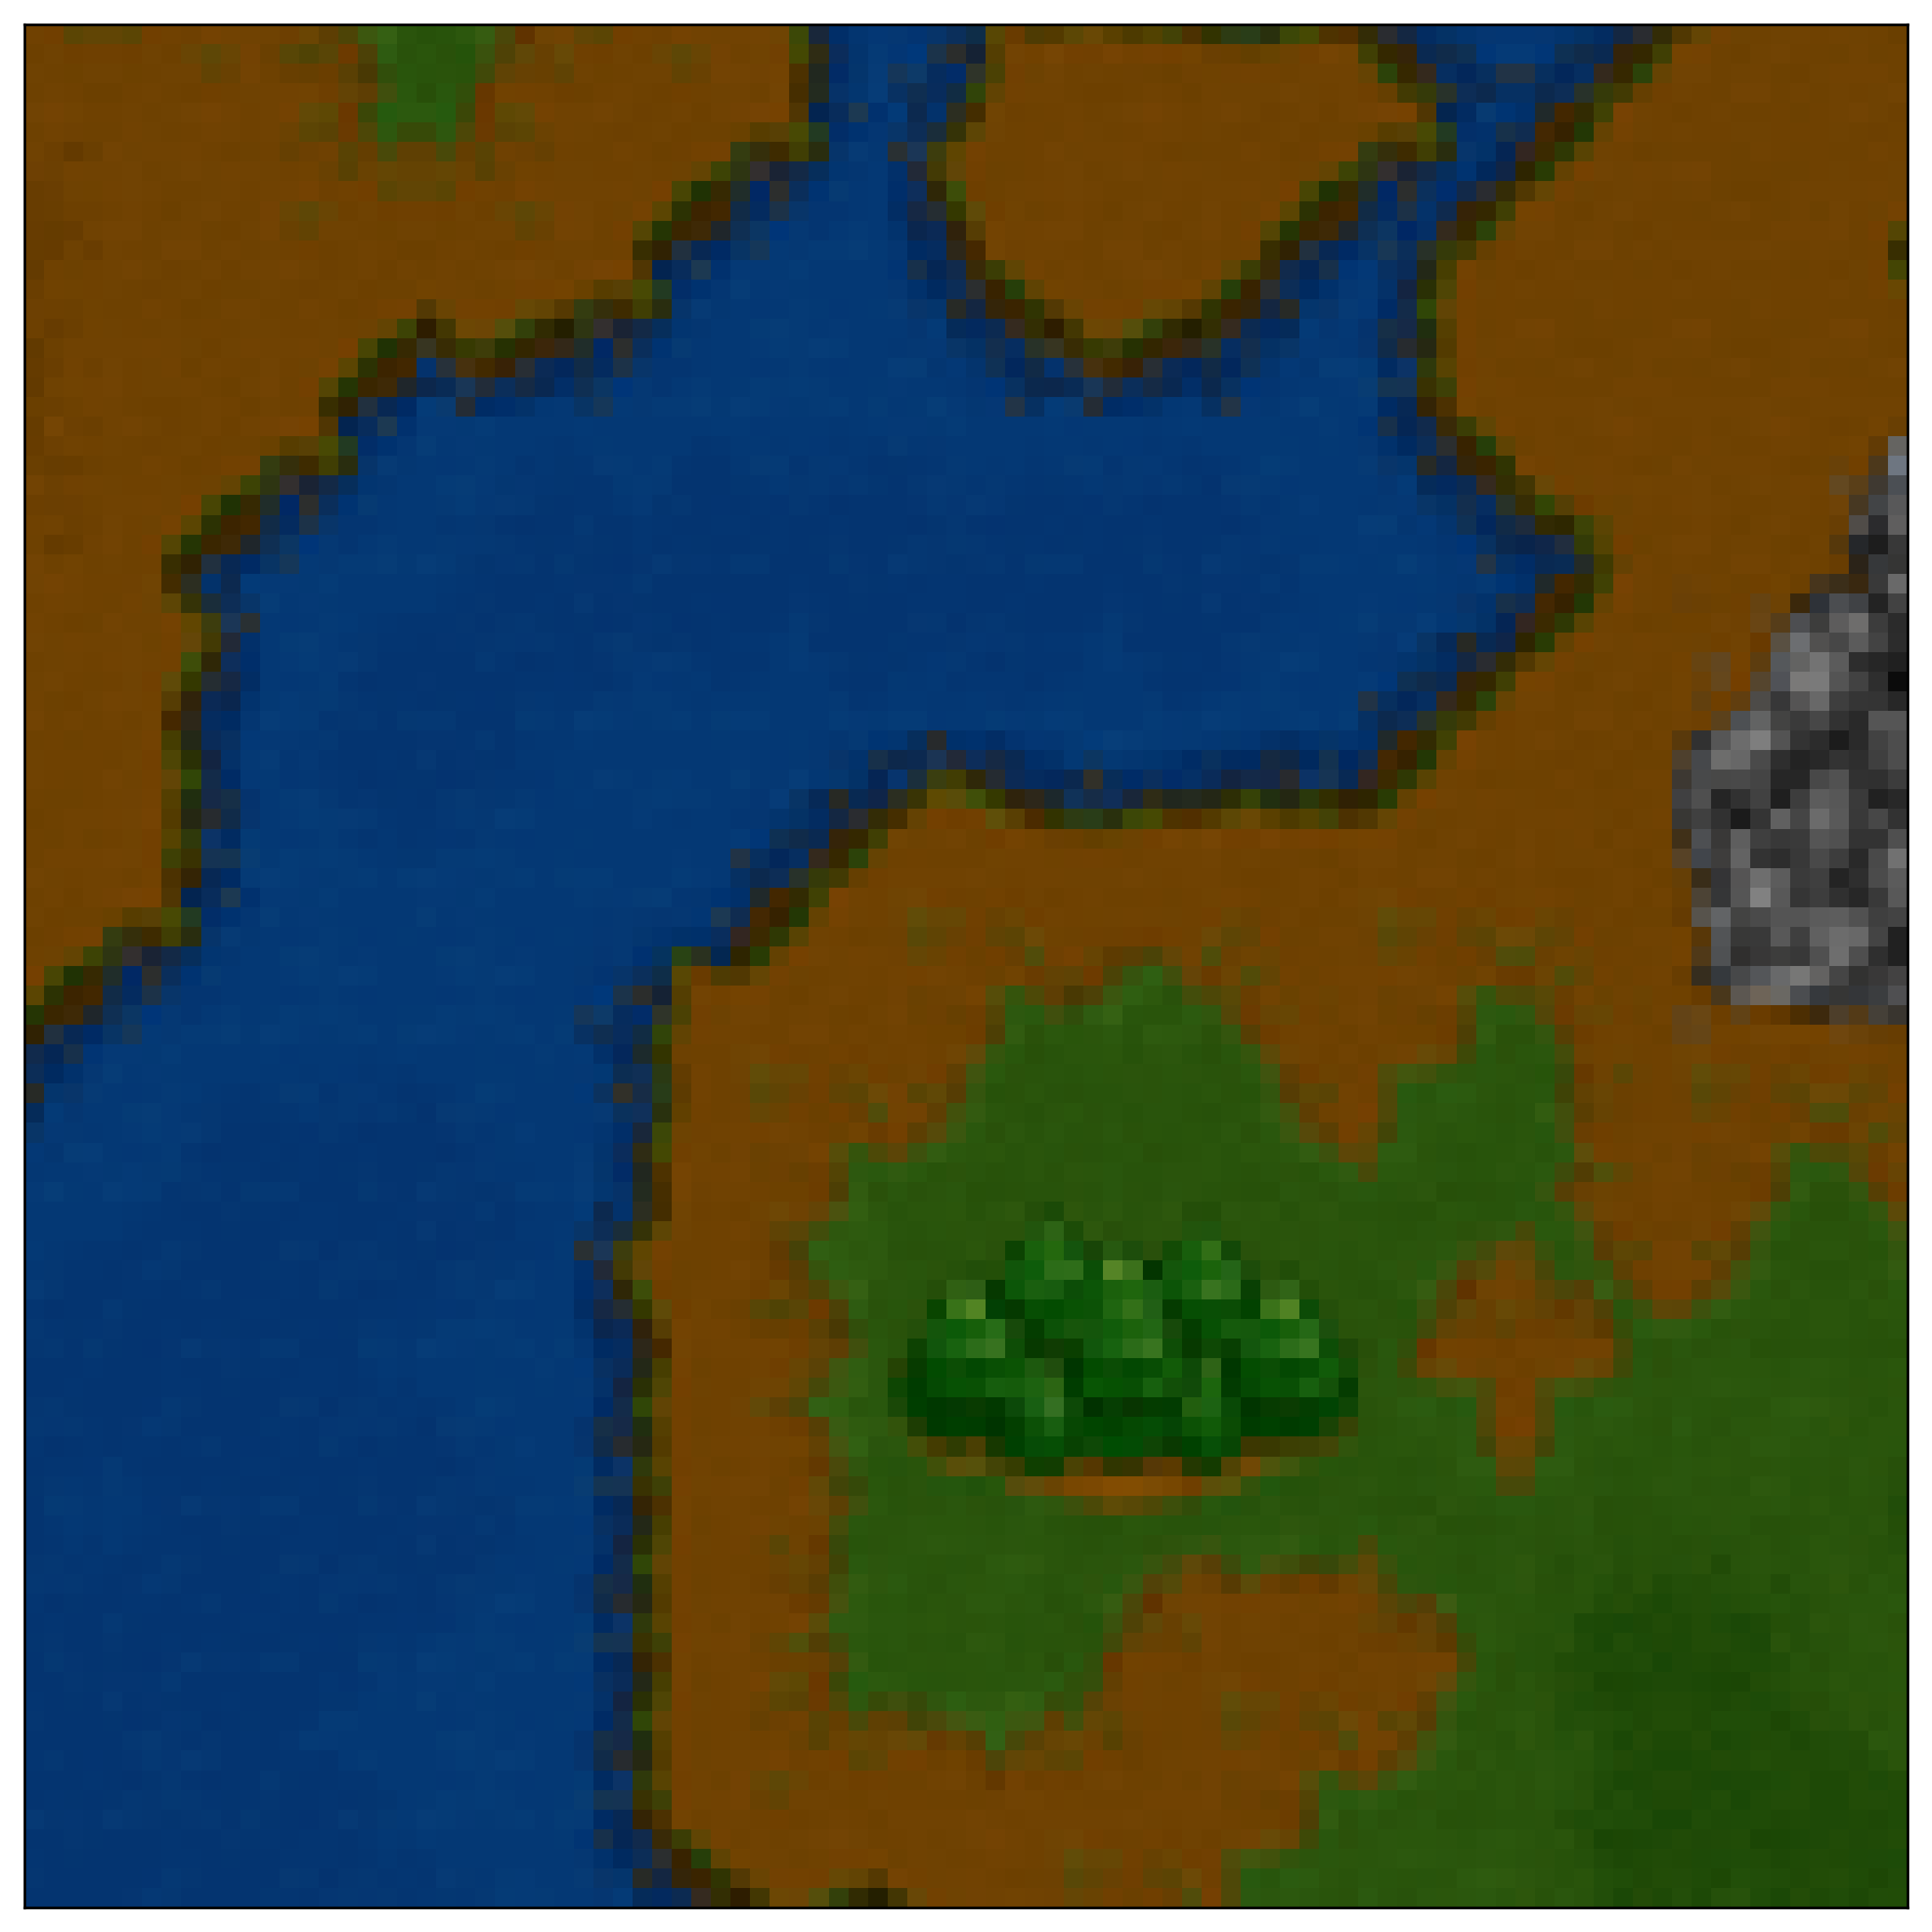

In [5]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Display the label matrix
cax = ax.matshow(image)

# Remove the axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("images/original_image_one.png")

(123,)


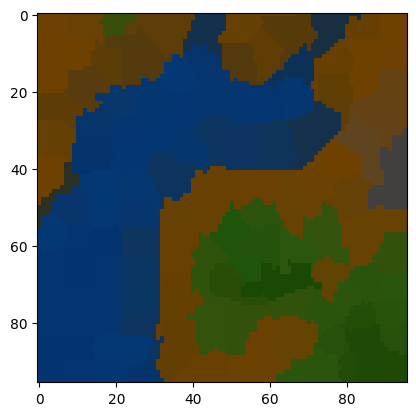

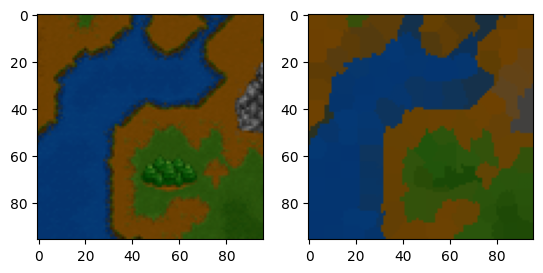

In [6]:
#use normal slic on the image
from skimage.segmentation import slic
#apply slic to the image
segments = slic(image, n_segments=200, compactness=10, sigma=0.0)

#plot the segments as a boundary
from skimage.segmentation import mark_boundaries
boundaries = mark_boundaries(image, segments)
plt.imshow(boundaries)
new_image = np.zeros((96, 96, 3))
#the segments are a 2d array of the same size as the image, and they assign
#where each pixel belongs to a superpixel, so use the superpixel classification
#to calculate the average colour of each superpixel

#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #now set the new image to have the average colour in the segment
    new_image[indices] = average_colour
#plot the new image
new_image = new_image / 255
plt.imshow(new_image)

#plot this alongside the original image
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
plt.show()

In [7]:
#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment

#find the average colour of each segment
average_colours = []
#find the centroid of each segment
centroids = []
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #find the centroid of the segment
    centroid = np.mean(indices, axis=1)
    #now set the new image to have the average colour in the segment
    average_colours.append(average_colour)
    centroids.append(centroid)

(123,)


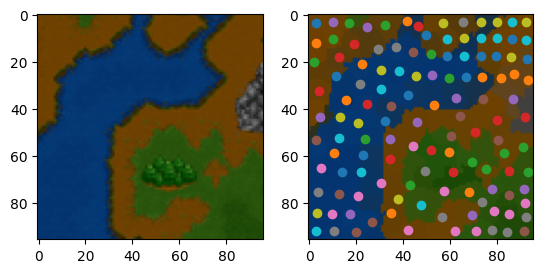

In [8]:
#plot the centroids with their average colours
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
for i in range(len(centroids)):
    axs[1].scatter(centroids[i][0], centroids[i][1])
plt.show()


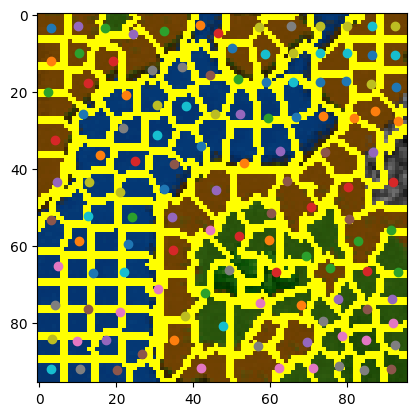

In [9]:
#plot the centodi, new_image and the borders associated with the slic in one image
plt.imshow(boundaries)
#plt.imshow(new_image, alpha=0.5)
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1])

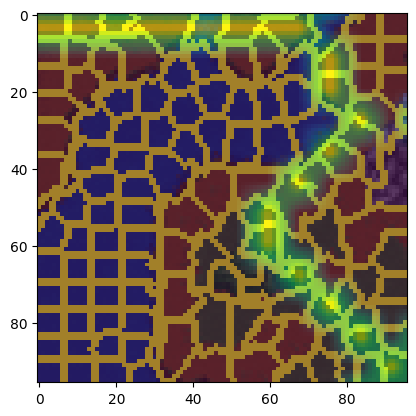

In [10]:
#show the boundaries on botht he image and the label
plt.imshow(boundaries)
#rescale the label to be the same size as the image
label = sk.transform.resize(label, (96, 96))
plt.imshow(label, alpha=0.5)


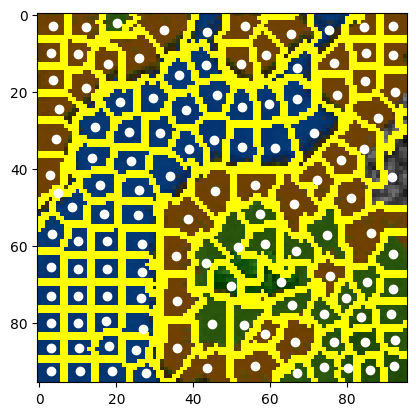

In [11]:
from skimage.measure import regionprops
plt.imshow(boundaries)
regions = regionprops(segments)
for props in regions:
    cx, cy = props.centroid  
    plt.plot(cy, cx, 'o', color="white")

In [12]:
#connect the centroids together based on their pixel location. Like you would do an image
#processing algorithm


<Figure size 640x480 with 0 Axes>

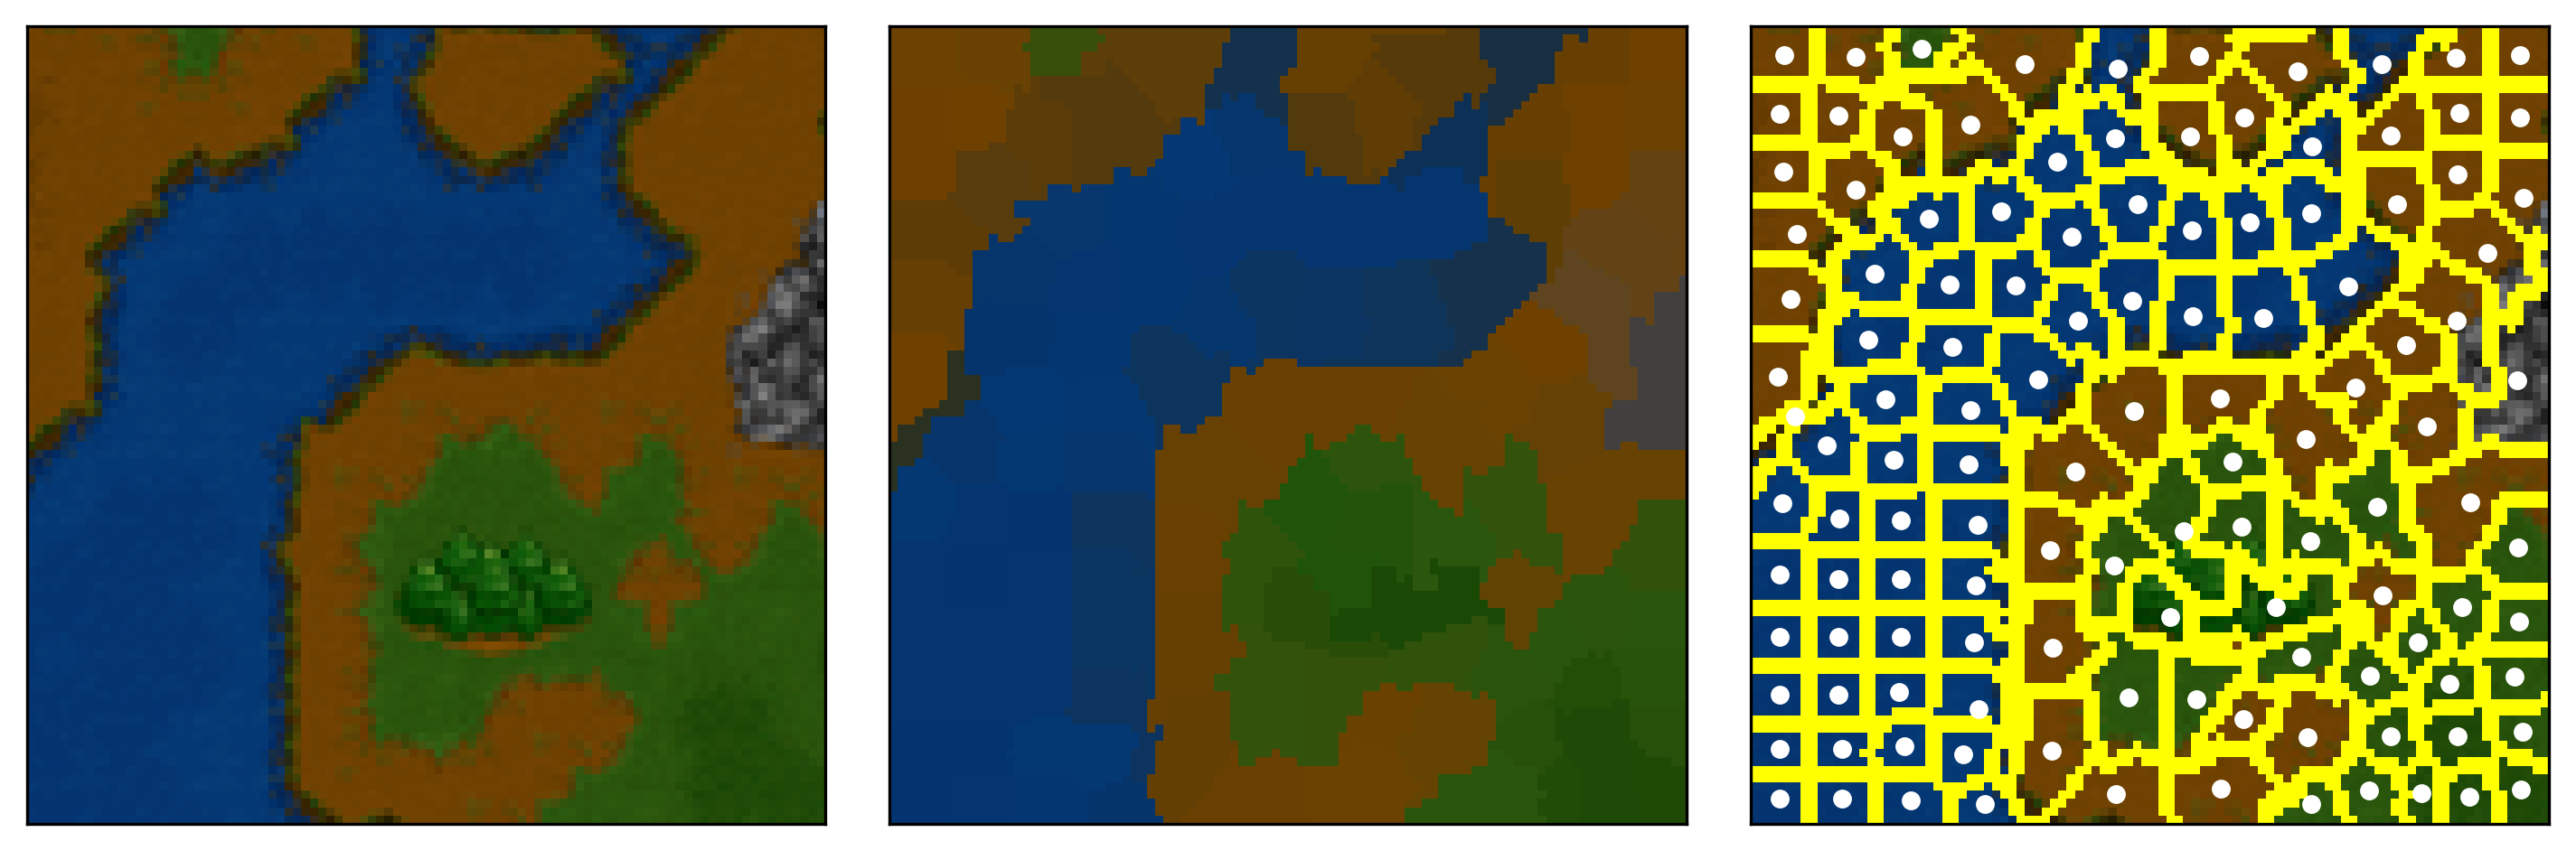

In [13]:
#Create a 3x3 image of this
plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=300)
ax[0].imshow(image.astype(np.uint8))
ax[1].imshow(new_image)
ax[2].imshow(boundaries)
regions = regionprops(segments)
for props in regions:
    cx, cy = props.centroid  
    ax[2].plot(cy, cx, 'o', color="white",
    markersize=4)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xticks([])
plt.subplots_adjust(wspace=0.08)  #


plt.savefig("graph_conversion.png", dpi=300)

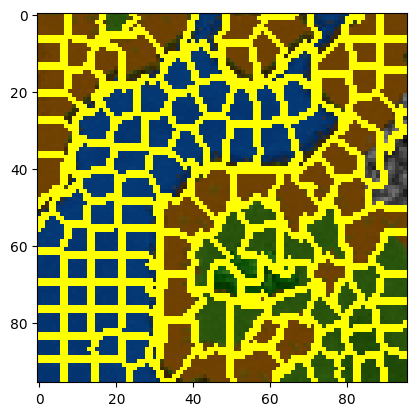

In [14]:
#creaetea  graph out of the centroids
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(len(centroids)))
#add edges between the centroids
for i in range(len(centroids)):
    for j in range(len(centroids)):
        if i != j:
            G.add_edge(i, j, weight=np.linalg.norm(centroids[i] - centroids[j]))
#now plot the graph
plt.imshow(boundaries)


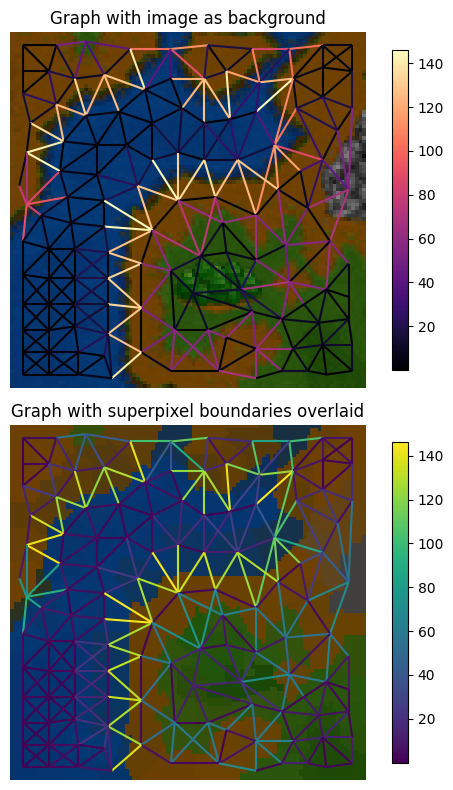

In [15]:
from skimage import data, segmentation
from skimage import graph
img = image
labels = segments
g = graph.rag_mean_color(img, labels)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].set_title('Graph with image as background')
lc = graph.show_rag(labels, g, img, ax=ax[0])
# specify the fraction of the plot area that will be used to draw the colorbar
ax[0].imshow(img)
fig.colorbar(lc, fraction=0.03, ax=ax[0])

ax[1].set_title("Graph with superpixel boundaries overlaid")

lc = graph.show_rag(labels, g, img, img_cmap='gray', edge_cmap='viridis', ax=ax[1])
fig.colorbar(lc, fraction=0.03, ax=ax[1])
ax[1].imshow(new_image)
for a in ax:
    a.axis('off')



plt.tight_layout()
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/torch_geometric/utils/convert.py:249: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  data[key] = torch.tensor(value)


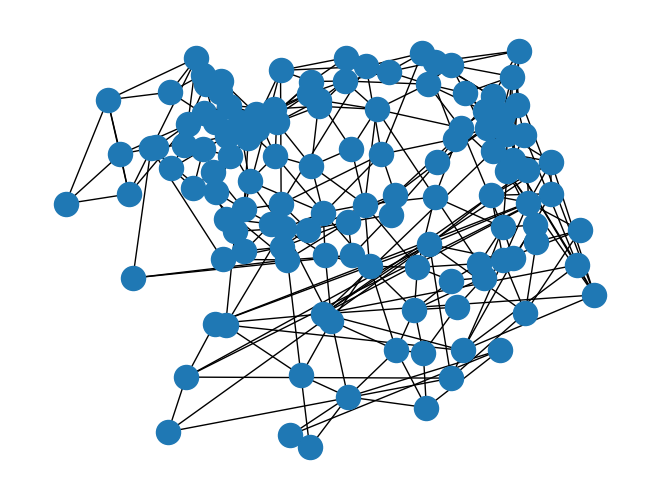

In [16]:
graph_two = graph.rag_mean_color(new_image, labels)
graph_two
type(graph_two)
nx.draw(graph_two)
graph_three = nx.Graph(graph_two)
#convert graph_three to pytorch geometric
import torch_geometric
from torch_geometric.data import Data
#convert the graph to a torch geometric data object
data = torch_geometric.utils.from_networkx(graph_three)

In [17]:
data
data["pixel count"]
data.pixel_count = data["pixel count"]
data.mean_color = data["mean color"]
data.total_color = data["total color"]  


In [18]:
data

Data(edge_index=[2, 682], labels=[123, 1], pixel count=[123], total color=[123, 3], mean color=[123, 3], weight=[682], num_nodes=123, pixel_count=[123], mean_color=[123, 3], total_color=[123, 3])

In [19]:
data.edge_attr

# How to extract the edge_weights etc

In [20]:
data.edge_weight

In [21]:
lc

In [22]:
g.edges


EdgeView([(1, 2), (1, 13), (1, 15), (2, 3), (2, 13), (2, 14), (3, 4), (3, 14), (3, 11), (4, 5), (4, 11), (4, 22), (5, 6), (5, 19), (5, 20), (5, 22), (6, 7), (6, 12), (6, 20), (7, 8), (7, 12), (7, 21), (8, 9), (8, 16), (8, 21), (9, 10), (9, 16), (9, 17), (9, 18), (10, 17), (10, 18), (11, 14), (11, 22), (11, 28), (11, 32), (12, 20), (12, 21), (12, 31), (13, 15), (13, 14), (13, 23), (13, 24), (14, 24), (14, 32), (15, 23), (16, 17), (16, 21), (16, 25), (16, 27), (16, 30), (16, 37), (17, 18), (17, 25), (18, 25), (18, 26), (19, 22), (19, 20), (19, 29), (20, 29), (20, 31), (20, 33), (21, 30), (21, 31), (22, 28), (22, 29), (22, 34), (23, 24), (23, 35), (24, 32), (24, 35), (24, 38), (25, 26), (25, 27), (25, 36), (26, 36), (26, 47), (27, 37), (27, 36), (27, 42), (28, 32), (28, 34), (28, 39), (28, 40), (29, 33), (29, 34), (29, 41), (30, 31), (30, 37), (30, 44), (31, 33), (31, 44), (31, 45), (32, 38), (32, 39), (33, 41), (33, 45), (33, 44), (34, 40), (34, 41), (34, 46), (35, 38), (35, 43), (36, 42

In [23]:
data.weight.shape

data.edge_index.shape
data.edge_attr = data.weight

In [24]:
data.edge_attr

tensor([1.4824e-02, 5.0467e-03, 3.8227e-03, 1.4824e-02, 2.0831e-01, 1.9169e-02,
        5.8590e-02, 2.0831e-01, 1.6590e-01, 1.6632e-01, 1.3903e-01, 1.6590e-01,
        3.9990e-01, 4.3158e-02, 5.4721e-01, 3.9990e-01, 4.3909e-01, 1.3472e-01,
        3.5330e-01, 1.6219e-01, 4.3909e-01, 6.8755e-02, 2.6560e-02, 8.9117e-02,
        6.8755e-02, 3.3110e-01, 4.2971e-02, 4.1966e-01, 3.3110e-01, 4.0111e-01,
        3.9830e-01, 9.3520e-02, 4.0111e-01, 3.1161e-02, 4.6946e-03, 3.1650e-02,
        2.3323e-02, 3.1161e-02, 6.4887e-04, 7.9839e-03, 1.3903e-01, 4.3158e-02,
        4.2321e-02, 5.0601e-01, 4.9508e-01, 4.7860e-01, 2.6560e-02, 4.2971e-02,
        6.3699e-02, 4.5856e-01, 5.5758e-01, 5.0467e-03, 1.9169e-02, 7.7451e-03,
        7.6369e-02, 5.3180e-03, 1.0171e-01, 5.8590e-02, 1.6632e-01, 4.2321e-02,
        7.6369e-02, 3.0991e-02, 5.2018e-01, 3.8227e-03, 7.7451e-03, 2.5607e-03,
        3.9830e-01, 4.6946e-03, 3.2227e-02, 4.8443e-01, 3.2191e-02, 3.1163e-02,
        5.7334e-01, 4.3183e-01, 3.1650e-

(array([278., 100.,  62.,  32.,   6.,  10.,   2.,  34.,  32.,  12.,   6.,
          8.,   6.,   6.,   4.,  10.,  10.,  30.,  16.,  18.]),
 array([8.20707018e-05, 2.87450934e-02, 5.74081161e-02, 8.60711388e-02,
        1.14734162e-01, 1.43397184e-01, 1.72060207e-01, 2.00723230e-01,
        2.29386252e-01, 2.58049275e-01, 2.86712298e-01, 3.15375321e-01,
        3.44038343e-01, 3.72701366e-01, 4.01364389e-01, 4.30027411e-01,
        4.58690434e-01, 4.87353457e-01, 5.16016480e-01, 5.44679502e-01,
        5.73342525e-01]),
 <BarContainer object of 20 artists>)

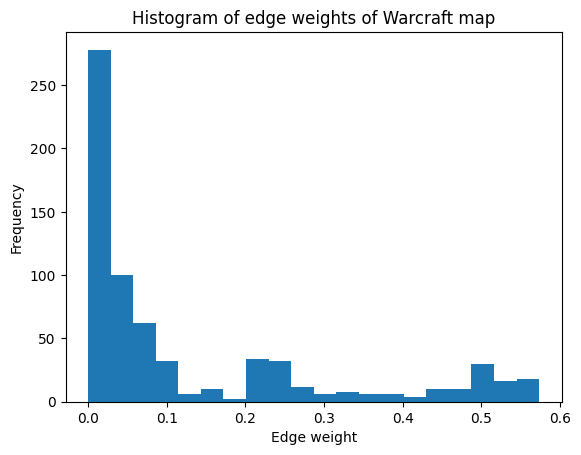

In [25]:
#plot a histogram of the edge weights
plt.show()
plt.title("Histogram of edge weights of Warcraft map")
plt.xlabel("Edge weight")
plt.ylabel("Frequency")
plt.hist(data.edge_attr, bins=20)


In [26]:
torch.save(data, "test_graph.pt")

# This weight represents the distance between the centroids (smaller is closer)

Putting it all together

(123,)


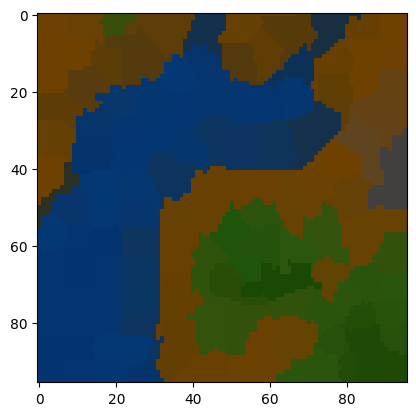

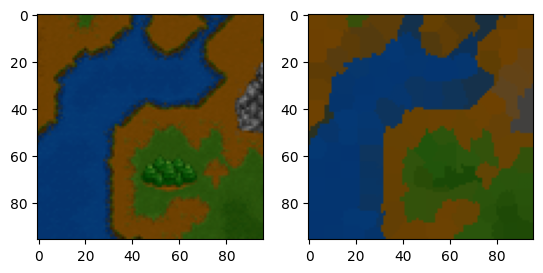

In [27]:
#use normal slic on the image
from skimage.segmentation import slic
#apply slic to the image
segments = slic(image, n_segments=200, compactness=10, sigma=0.0)

#plot the segments as a boundary
from skimage.segmentation import mark_boundaries
boundaries = mark_boundaries(image, segments)
plt.imshow(boundaries)
new_image = np.zeros((96, 96, 3))
#the segments are a 2d array of the same size as the image, and they assign
#where each pixel belongs to a superpixel, so use the superpixel classification
#to calculate the average colour of each superpixel

#first, find the unique values in segments
unique_segments = np.unique(segments)
print(unique_segments.shape)
#now iterate through each unique segment and find the average colour of that segment
for segment in unique_segments:
    #find the indices of the segment
    indices = np.where(segments == segment)
    #find the average colour of the segment
    average_colour = np.mean(image[indices], axis=0)
    #now set the new image to have the average colour in the segment
    new_image[indices] = average_colour
#plot the new image
new_image = new_image / 255
plt.imshow(new_image)

#plot this alongside the original image
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(new_image)
plt.show()

In [28]:
labels = segments
labels = labels 

regions = regionprops(labels)

In [29]:
from skimage import graph
from skimage import graph, data, io, segmentation, color
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage import draw
import numpy as np
import networkx as nx
 
rag = graph.rag_mean_color(image, labels)
for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']
graph_x = nx.Graph(rag)


In [30]:
#conver to torch geometric
import torch_geometric as pyg
from torch_geometric.data import Data
data = pyg.utils.from_networkx(graph_x)
data["centroid"]

tensor([[ 3.0000,  3.5000],
        [ 3.1562, 12.1094],
        [ 2.2500, 20.0909],
        [ 4.0758, 32.4470],
        [ 4.6047, 43.5930],
        [ 3.0375, 53.4375],
        [ 4.9558, 65.3097],
        [ 4.0116, 75.3837],
        [ 3.3036, 84.3393],
        [ 3.0000, 92.0000],
        [11.3830, 25.8794],
        [10.4359, 58.8462],
        [10.2182, 10.0182],
        [12.7600, 17.7333],
        [10.0000,  3.0000],
        [12.6800, 76.4267],
        [ 9.8846, 84.7692],
        [10.5000, 92.0000],
        [12.9855, 43.3623],
        [12.7195, 52.2805],
        [13.9571, 67.0000],
        [15.8116, 36.3478],
        [16.9455,  3.4364],
        [19.1429, 12.1429],
        [17.3448, 84.5345],
        [20.1216, 92.4324],
        [20.8721, 77.2326],
        [21.7361, 29.5694],
        [20.9375, 46.0750],
        [21.9494, 66.8608],
        [23.1304, 59.5507],
        [22.6087, 20.9565],
        [24.0147, 52.5882],
        [24.8169, 38.0704],
        [24.4615,  5.0385],
        [26.7870, 88

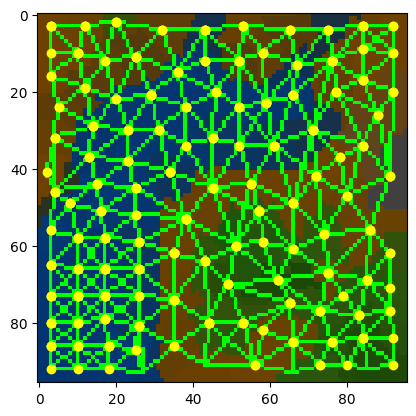

In [31]:
#plot the graph with the centroids
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    for u, v, attr in g.edges(data=True):
        n1 = u
        n2 = v
 
        r1, c1 = map(int, rag.nodes[n1]['centroid'])
        r2, c2 = map(int, rag.nodes[n2]['centroid'])
 
        line  = draw.line(r1, c1, r2, c2)
        #circle = draw.circle(r1,c1,2)
 
        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        
        #image[circle] = 1,1,0
        #add scatter 
        plt.scatter(c1, r1, color="yellow")
        #tranpose the scaaattered image
        
 
    return image
image_with_rag = display_edges(new_image, rag, threshold=np.inf)
plt.imshow(image_with_rag)

In [32]:
rag.edges().data()

EdgeDataView([(1, 2, {'weight': 3.780025680944104}), (1, 13, {'weight': 1.2869166619699155}), (1, 15, {'weight': 0.9747969384545397}), (2, 3, {'weight': 53.11812641635367}), (2, 13, {'weight': 4.887977022889052}), (2, 14, {'weight': 14.940436580826358}), (3, 4, {'weight': 42.30427979616889}), (3, 14, {'weight': 42.41113157366878}), (3, 11, {'weight': 35.45363779519116}), (4, 5, {'weight': 101.97489051978887}), (4, 11, {'weight': 11.00536476483074}), (4, 22, {'weight': 139.53861842412138}), (5, 6, {'weight': 111.9678018281492}), (5, 19, {'weight': 34.35290760956424}), (5, 20, {'weight': 90.09223211085086}), (5, 22, {'weight': 41.358854384262116}), (6, 7, {'weight': 17.53247433161722}), (6, 12, {'weight': 6.772675982007772}), (6, 20, {'weight': 22.724895436953368}), (7, 8, {'weight': 84.43012690107031}), (7, 12, {'weight': 10.957663276058131}), (7, 21, {'weight': 107.01435306051826}), (8, 9, {'weight': 102.28307275874523}), (8, 16, {'weight': 101.56715910194782}), (8, 21, {'weight': 23.8

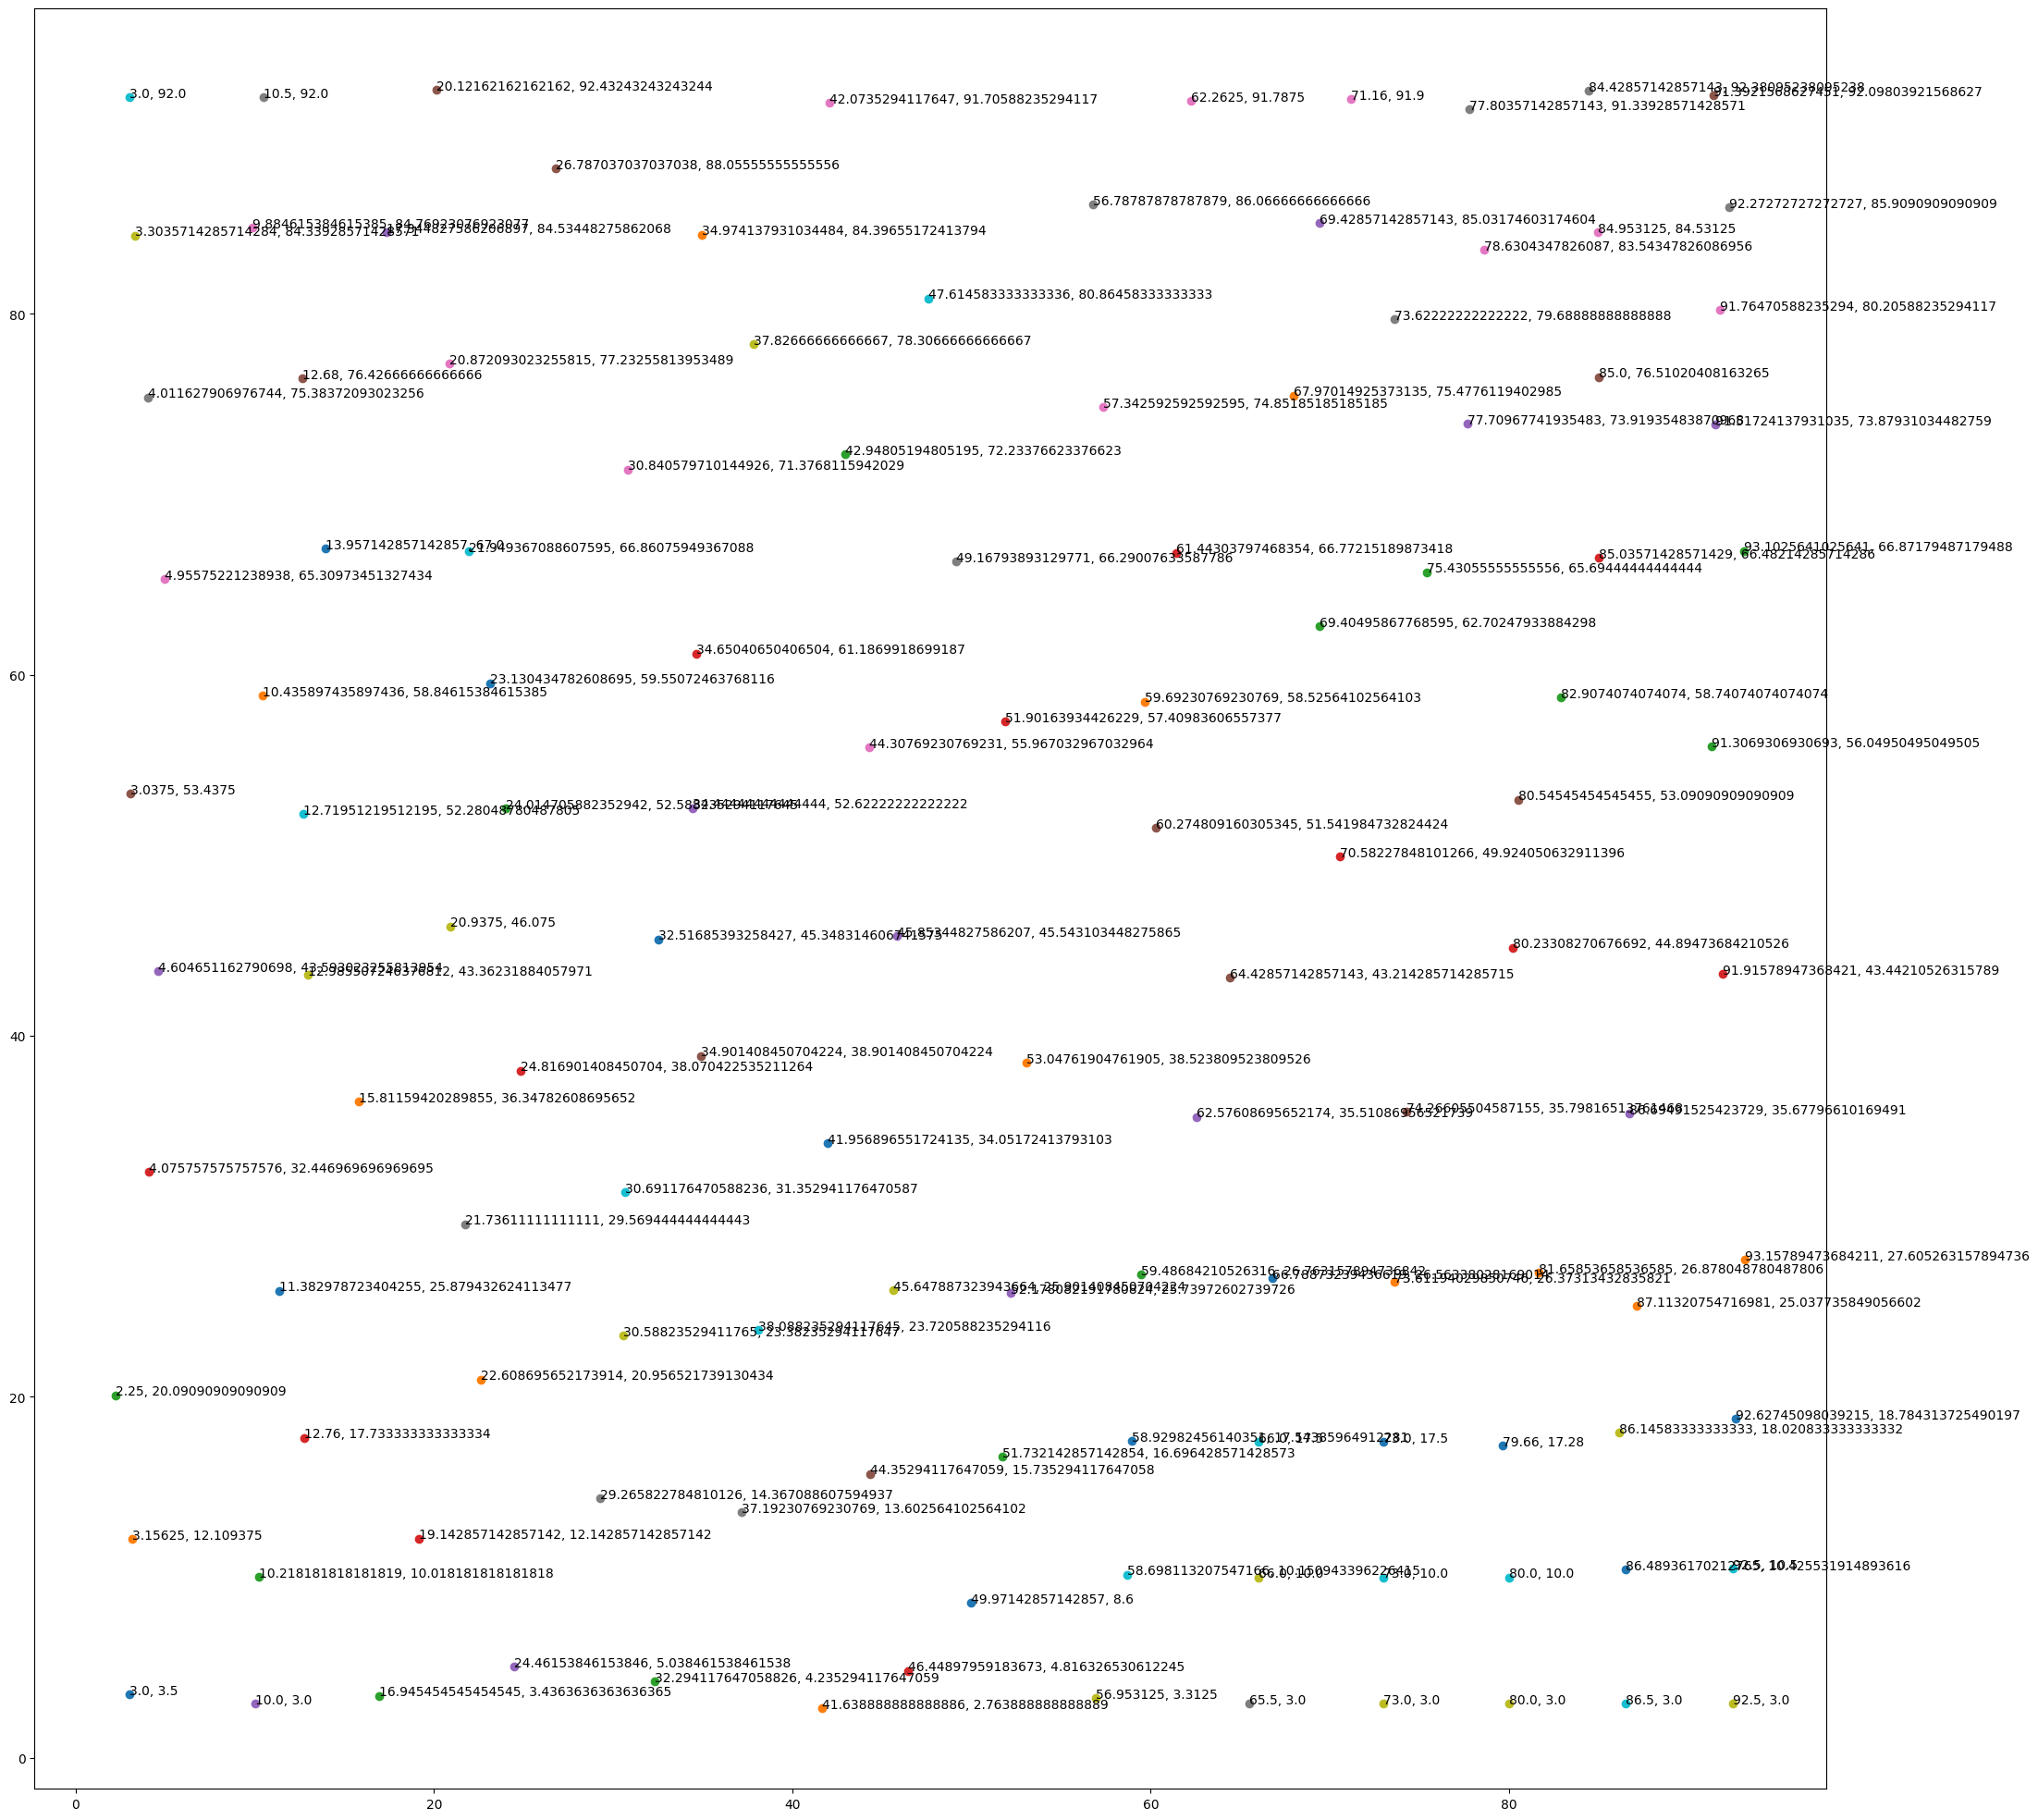

In [33]:
#plot the centeroids and write the centroid x and y values on the image
#increase the size of the image
plt.figure(figsize=(25, 25))
for region in regions:
    plt.scatter(region['centroid'][0], region['centroid'][1])
    plt.text(region['centroid'][0], region['centroid'][1], str(region['centroid'][0]) + ", " + str(region['centroid'][1]))

In [34]:
torch.save(data, "test_graph.pt")

Using the label image, can we allocate each of the centroid positions to a pixel in the image?


81

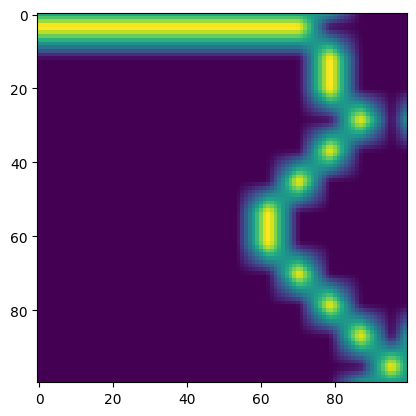

In [35]:
#Using the label image, allocate each centroid position as a point on the image. If the centroid is on a point
#that is not a superpixel, then allocate it to the nearest superpixel
#convert he label image to a 123 x 123 image
label = sk.transform.resize(label, (100, 100))
num_not_superpixel = 0
plt.imshow(label)
#check whether each of the points lie within a superpixel
#iterate through each centroid and check whether it is in a superpixel
for i in range(len(centroids)):
    #check whether the centroid is in a superpixel
    if label[int(centroids[i][0]), int(centroids[i][1])] == 0:
        #if it is not in a superpixel, then fin
        num_not_superpixel += 1
    
num_not_superpixel

In [124]:
#using the same slic boundaries obtained for image, use the same boundaries for the label 
#image
label
label_segments = slic(label, n_segments=200, compactness=10, sigma=0.0,
                      channel_axis=-1, start_label=0)
plt.imshow(label_segments)


ValueError: channel_axis=-1 indicates multichannel, which is not supported for a two-dimensional image; use channel_axis=None if the image is grayscale

# Recreating the image from labels


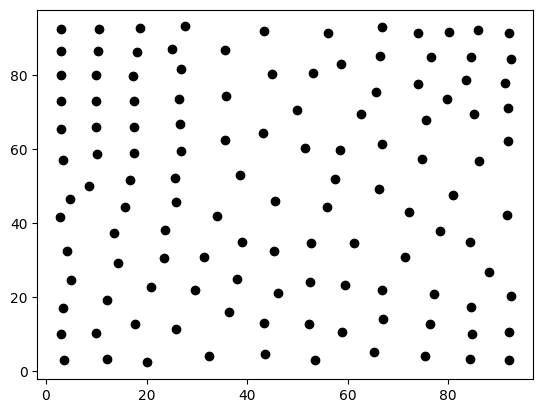

In [38]:
label = sk.transform.resize(label, (96, 96))
#plt.imshow(label, alpha=0.5)
all_centroids = data["centroid"]
#conver to numpy for plotting
all_centroids = all_centroids.numpy()
#plot the centroids on the label image
#plt.imshow(label, alpha=0.5)
plt.scatter(data["centroid"][:,1], data["centroid"][:, 0],
            color="black")

In [126]:
new_centroid.T

array([[ 3.        ,  3.        ],
       [ 3.15625   ,  3.15625   ],
       [ 2.25      ,  2.25      ],
       [ 4.07575758,  4.07575758],
       [ 4.60465116,  4.60465116],
       [ 3.0375    ,  3.0375    ],
       [ 4.95575221,  4.95575221],
       [ 4.01162791,  4.01162791],
       [ 3.30357143,  3.30357143],
       [ 3.        ,  3.        ],
       [11.38297872, 11.38297872],
       [10.43589744, 10.43589744],
       [10.21818182, 10.21818182],
       [12.76      , 12.76      ],
       [10.        , 10.        ],
       [12.68      , 12.68      ],
       [ 9.88461538,  9.88461538],
       [10.5       , 10.5       ],
       [12.98550725, 12.98550725],
       [12.7195122 , 12.7195122 ],
       [13.95714286, 13.95714286],
       [15.8115942 , 15.8115942 ],
       [16.94545455, 16.94545455],
       [19.14285714, 19.14285714],
       [17.34482759, 17.34482759],
       [20.12162162, 20.12162162],
       [20.87209302, 20.87209302],
       [21.73611111, 21.73611111],
       [20.9375    ,

In [144]:
centroid_is_path = np.zeros(len(data["centroid"])) # One-hot encoding if a centroid is part of the path or not
centroid = data["centroid"].numpy()
#change the columns of centroids
centroid_array = data["centroid"].numpy()
#generate a new array that takes a centroid_array columns and rows 
new_centroid = np.array([centroid_array[:, 0], centroid_array[:, 1]])
centroid = new_centroid.T
#new_centroid = np.array(data["centroid"][:, 1].numpy(), data["centroid"][:, 0].numpy())
for row in range(len(label)):
    for column in range(len(label)):
        if label[column,row] > np.max(label) - (0.1*np.max(label)): # Choose the 30% brightest spots on the label only
            dists = [np.linalg.norm([column, row] - c) for c in data["centroid"].numpy()]

            centroid_is_path[np.argmin(dists)] = 1

centroid_is_path


array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0.])

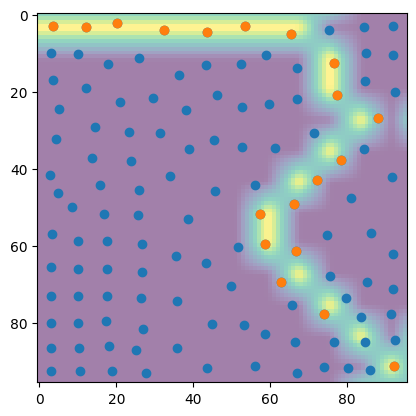

In [148]:
label = sk.transform.resize(label, (96, 96))
plt.imshow(label, alpha=0.5)
plt.scatter(data["centroid"][:, 1], data["centroid"][:, 0])
plt.scatter(data["centroid"][np.argwhere(centroid_is_path),1], data["centroid"][np.argwhere(centroid_is_path),0])

<Figure size 640x480 with 0 Axes>

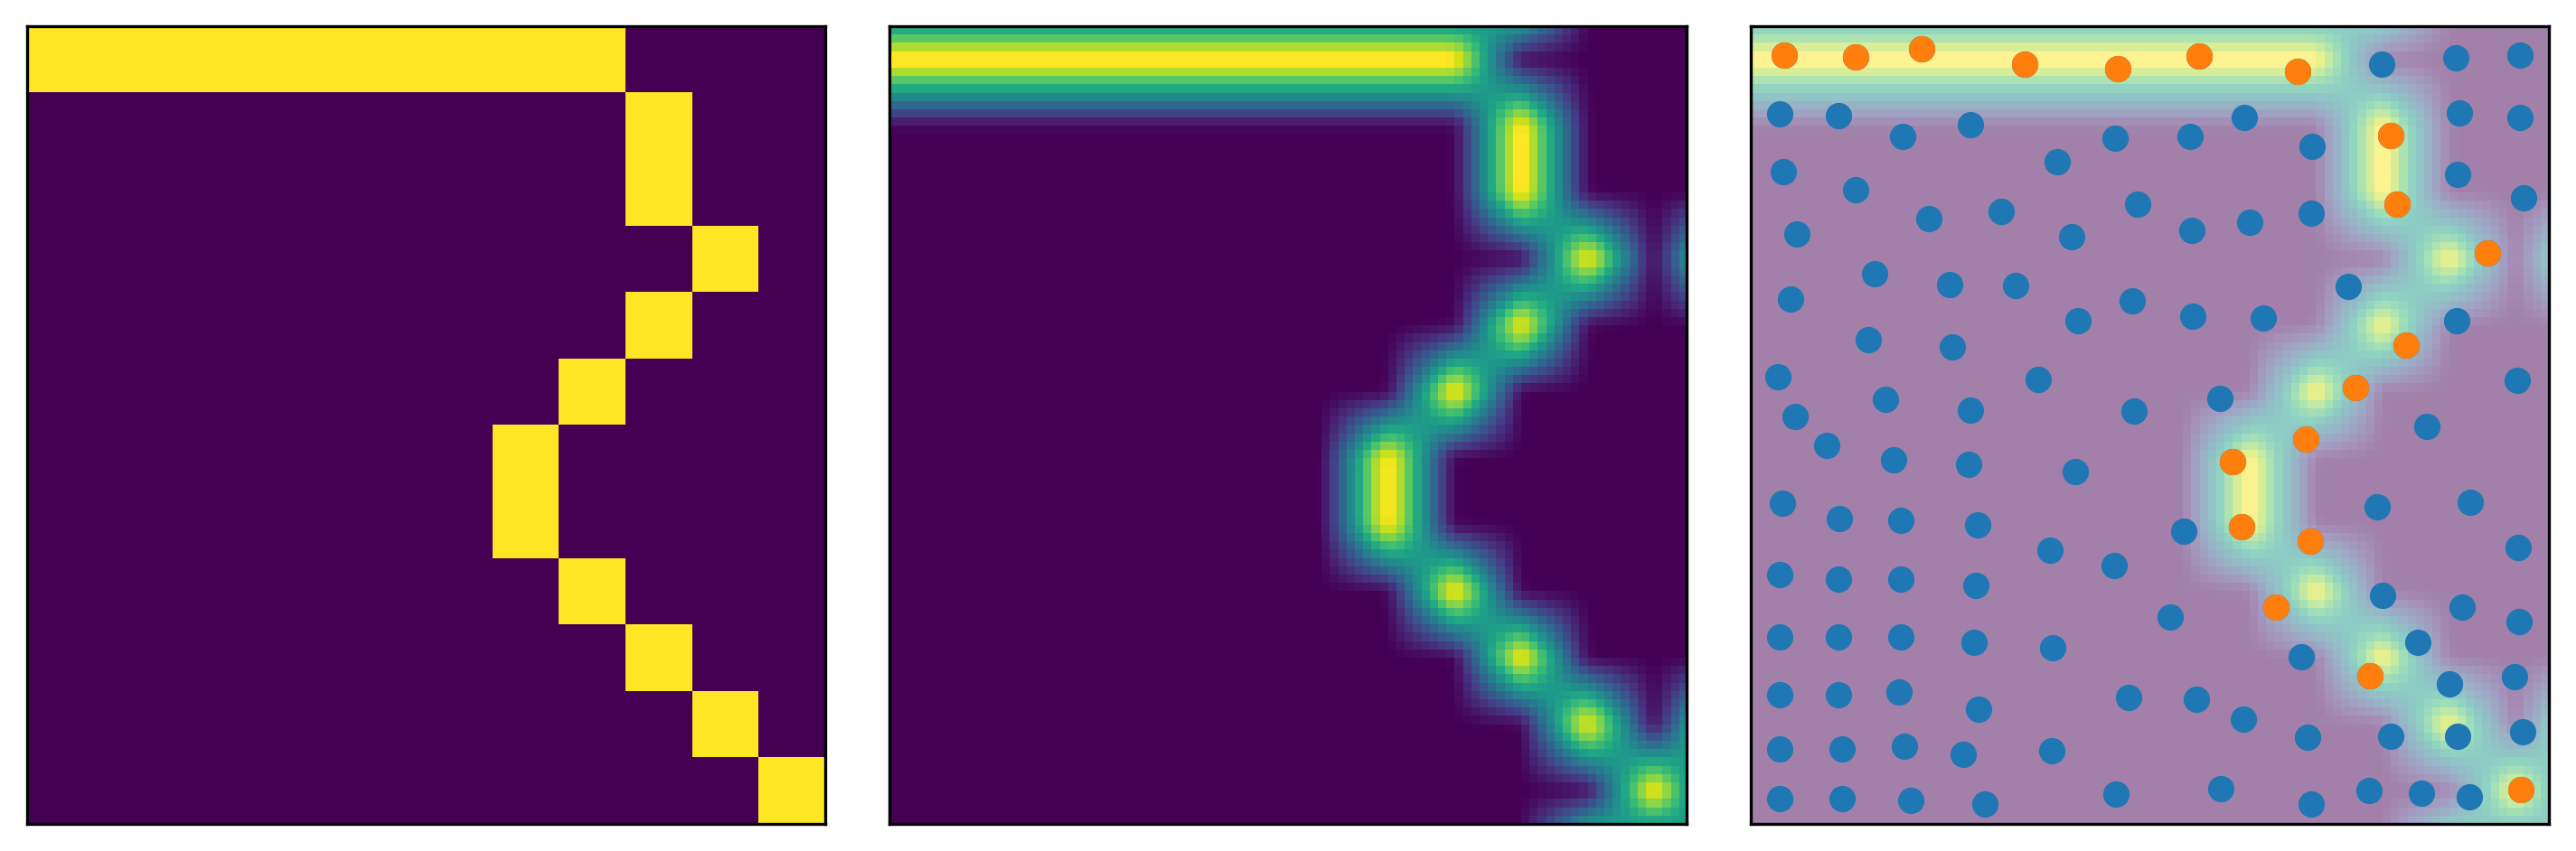

In [152]:
#Create a 3x3 image of this
plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=300)
# ax[0].imshow(image.astype(np.uint8))
# ax[1].imshow(new_image)
# ax[2].imshow(boundaries)
# regions = regionprops(segments)
# for props in regions:
#     cx, cy = props.centroid  
#     ax[2].plot(cy, cx, 'o', color="white",
#    markersize=4)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xticks([])
ax[0].imshow(np.load(label_path)[trial_index])
label = sk.transform.resize(label, (96, 96))
ax[1].imshow(label)

ax[2].imshow(label, alpha=0.5)
ax[2].scatter(data["centroid"][:, 1], data["centroid"][:, 0])
ax[2].scatter(data["centroid"][np.argwhere(centroid_is_path),1], data["centroid"][np.argwhere(centroid_is_path),0])
plt.subplots_adjust(wspace=0.08)  #


plt.savefig("label_conversion.png", dpi=300)

In [128]:

def path_to_graph(centroids, label, sensitivity=0.25,
                  resize_shape=(96, 96)):
    """"""
    label = sk.transform.resize(label, resize_shape)
    centroid_is_path = np.zeros(len(centroids)) # One-hot encoding if a centroid is part of the path or not
    # centroid = centroids.numpy()

    for row in range(len(label)):
        for column in range(len(label)):
            if label[column, row] > np.max(label) - (sensitivity*np.max(label)): # Choose the 30% brightest spots on the label only
                dists = [np.linalg.norm([row, column] - c) for c in centroid] 

                centroid_is_path[np.argmin(dists)] = 1
    
    return torch.tensor(centroid_is_path)
centroid_is_path = path_to_graph(data["centroid"], label)

In [ ]:
data["centroid_is_path"] = centroid_is_path

In [ ]:
from skimage import graph as sk_graph
#set seed
np.random.seed(42)
def convert_image_to_graph(image, num_segments, compactness=10, sigma=0.0):

    segments = slic(image, n_segments=num_segments, compactness=compactness,
                     sigma=sigma,
                    enforce_connectivity=True, start_label=0)

    rag = sk_graph.rag_mean_color(image, segments)
    regions = regionprops(segments)

    for region in regions:
        rag.nodes[region['label']]['centroid'] = region['centroid']
    graph = nx.Graph(rag)

    #graph = nx.Graph(graph_two)
    #convert graph_three to pytorch geometric
    #convert the graph to a torch geometric data object
    data = torch_geometric.utils.from_networkx(graph)
    data.pixel_count = data["pixel count"]
    data.mean_color = data["mean color"]
    data.total_color = data["total color"] 
    data.edge_attr = data.weight
    return data
     
    

In [ ]:
data = convert_image_to_graph(image, 200, compactness=10, sigma=0.0)
data

ValueError: Not all nodes contain the same attributes

In [ ]:
data_2 = convert_image_to_graph(image, 200)
data_2

Data(edge_index=[2, 656], labels=[123, 1], pixel count=[123], total color=[123, 3], mean color=[123, 3], centroid=[123, 2], weight=[656], num_nodes=123, pixel_count=[123], mean_color=[123, 3], total_color=[123, 3], edge_attr=[656])

In [ ]:
#check if the two graphs are the same
data_2.edge_attr == data.edge_attr


False

In [ ]:
data_2.edge_attr, data.edge_attr

(tensor([1.6295e-03, 5.2201e-02, 5.8369e-02, 1.6295e-03, 1.6318e-02, 5.7181e-02,
         5.2549e-02, 1.6318e-02, 3.9840e-02, 3.6289e-02, 3.9840e-02, 3.8436e-03,
         3.5599e-03, 1.4826e-02, 3.8436e-03, 3.4814e-02, 1.4395e-02, 3.6276e-02,
         3.4814e-02, 1.3912e-02, 2.6064e-03, 2.5027e-01, 2.3783e-01, 1.3912e-02,
         1.9848e-02, 2.3639e-01, 1.9848e-02, 2.3440e-02, 2.5411e-01, 2.5136e-01,
         2.3440e-02, 1.8939e-01, 2.0719e-01, 2.2957e-01, 1.8939e-01, 5.4777e-02,
         3.6578e-02, 2.6863e-01, 2.1939e-01, 5.4777e-02, 1.8124e-01, 1.1938e-02,
         2.7233e-01, 1.8124e-01, 1.9188e-01, 1.9459e-01, 2.0719e-01, 3.6578e-02,
         3.4647e-02, 3.0053e-01, 3.6084e-02, 2.3817e-02, 5.2549e-02, 3.6289e-02,
         3.5599e-03, 1.6896e-02, 5.0550e-03, 2.8580e-02, 1.1938e-02, 1.9188e-01,
         2.8337e-01, 4.3934e-03, 6.4103e-03, 4.2530e-02, 1.9459e-01, 4.3934e-03,
         5.6077e-03, 1.4826e-02, 1.4395e-02, 1.6896e-02, 2.2282e-02, 1.1856e-02,
         2.5348e-01, 3.6276e

In [ ]:
data["centroid"]

TypeError: 'module' object is not subscriptable

In [ ]:
import skimage
skimage.__version__

'0.22.0'

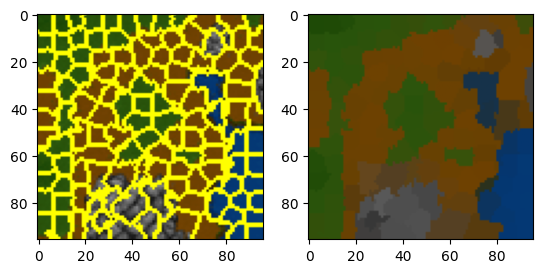

In [ ]:

import numpy as np
from torch_geometric.data import Data
from torch_geometric.transforms import ToSLIC
import torch
#torch transform bilinear interpolation
#torch transform resize
from torch.nn.functional import interpolate
from skimage.segmentation import slic
from skimage import graph as sk_graph
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.measure import regionprops
import networkx as nx
import torch_geometric as pyg

def path_to_graph(centroids, label, sensitivity=0.25,
                  resize_shape=(96, 96)):
    """"""
    label = sk.transform.resize(label, resize_shape)
    centroid_is_path = np.zeros(len(centroids)) # One-hot encoding if a centroid is part of the path or not
    centroid = centroids.numpy()

    for row in range(len(label)):
        for column in range(len(label)):
            if label[column, row] > np.max(label) - (sensitivity*np.max(label)): # Choose the 30% brightest spots on the label only
                dists = [np.linalg.norm([row, column] - c) for c in centroid] 

                centroid_is_path[np.argmin(dists)] = 1
    
    return torch.tensor(centroid_is_path)

def convert_image_to_graph(image, num_segments, label, compactness=10, sigma=0.0):
    """
    We have an image of size 12x12. We want to convert this into a graph
    where the nodes are the pixels. The edges are the pixels that are adjacent
    to each other. 
    
    The attribute of each node is a 3 dimensional vector,
    which is the RGB value of the pixel.
    """
    #first we need to create the nodes
    #the nodes are the pixels in the image
    segments = slic(image, n_segments=num_segments, compactness=compactness,
                     sigma=sigma,
                    enforce_connectivity=True)

    new_image = np.zeros((96, 96, 3))

    unique_segments = np.unique(segments)
    for segment in unique_segments:
        indices = np.where(segments == segment)
        average_colour = np.mean(image[indices], axis=0)
        new_image[indices] = average_colour
    new_image = new_image / 255

    boundaries_test = find_boundaries(segments)
    boundaries = mark_boundaries(image, segments)

    #plot boundaries and new image side by side
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(boundaries)
    axs[1].imshow(new_image)
    plt.show()
    rag = sk_graph.rag_mean_color(new_image, segments)
    regions = regionprops(segments)

    for region in regions:
        rag.nodes[region['label']]['centroid'] = region['centroid']
    graph = nx.Graph(rag)

    #graph = nx.Graph(graph_two)
    #convert graph_three to pytorch geometric
    #convert the graph to a torch geometric data object
    data = pyg.utils.from_networkx(graph)
    data.pixel_count = data["pixel count"]
    data.mean_color = data["mean color"]
    data.total_color = data["total color"] 
    data.edge_attr = data.weight
    data.labels = data.labels - 1.0    centroid_is_path = path_to_graph(data["centroid"], label)
    data["centroid_in_path"] = centroid_is_path
    return data
    
data = convert_image_to_graph(image, 200, label=label, compactness=10, sigma=0.0)

In [ ]:
image.shape

(96, 96, 3)

In [ ]:
def path_to_graph(centroids, label, sensitivity=0.25,
                  resize_shape=(96, 96)):
    """"""
    label = sk.transform.resize(label, resize_shape)
    centroid_is_path = np.zeros(len(centroids)) # One-hot encoding if a centroid is part of the path or not
    centroid = centroids.numpy()

    for row in range(len(label)):
        for column in range(len(label)):
            if label[column, row] > np.max(label) - (sensitivity*np.max(label)): # Choose the 30% brightest spots on the label only
                dists = [np.linalg.norm([row, column] - c) for c in centroid] 

                centroid_is_path[np.argmin(dists)] = 1
    
    return torch.tensor(centroid_is_path)